In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# set random seed
np.random.seed(7)

# dir = "E:/ChristianMusaeus/Data/Turkish"
# with open(f"{dir}/combined_stft_features_19_final.pkl", "rb") as f:
#     data = pickle.load(f)

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked"
# open hospital_spectrograms.csv
data = pd.read_csv(f"{dir}/hospital_spectrograms.csv")

print(data.head())
y = data['label'].values
patient_ids = data['patient_id'].values
data = data.iloc[:, :-2].values

# # Normalize per patient (within training and test sets)
# data = data.iloc[:, :-2].values  # Drop the label column
# data_norm = []
# for patient_id in np.unique(patient_ids):
#     patient_data = data[patient_ids == patient_id]
#     scaler = StandardScaler()
#     # scaler = MinMaxScaler()
#     patient_data_scaled = scaler.fit_transform(patient_data)
#     data_norm.append(patient_data_scaled)

# data_norm = np.concatenate(data_norm, axis=0)
# # add labels back
# data = data_norm

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# param_grid = {
#     'n_neighbors': [1,3,5,7,9]
# }

knn = KNeighborsClassifier(n_neighbors=1)
accs = []
preds = []

# Train-test split using Leave-One-Group-Out
for i, (train_index, test_index) in enumerate(logo.split(data, y, groups=patient_ids)):
    # print(f"Patient {i+1} out of {len(np.unique(patient_ids))}")
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the knn model
    model = knn.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    preds.extend(y_pred)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    accs.append(accuracy)
    print(f'Model accuracy for Patient {i+1}: {accuracy*100:.2f}%')

# Print confusion matrix
cm = confusion_matrix(y, preds)
# print(cm)

# Print classification report
cr = classification_report(y, preds)
# print(cr)


# Print the average accuracy over all patients
print(f'Average accuracy across patients: {np.mean(accs)*100:.2f}%')

# save the model to dir 
with open(f"{dir}/knn_Standard_hospital_model.pkl", "wb") as f:
    pickle.dump(knn, f)
    
# save the predictions as a numpy file to dir 
np.save(f"{dir}/knn_Standard_hospital_preds.npy", preds)



          0         1         2         3         4         5         6  \
0  0.151234  0.278911  0.629844  0.295927  0.089162  0.125800  0.146829   
1  0.032602  0.409366  0.343372  0.078323  0.204336  0.076418  0.402673   
2  0.215329  0.560507  0.068171  0.499846  0.250219  0.187643  0.597513   
3  0.121505  0.537071  0.995938  0.048816  0.560859  0.227521  0.611711   
4  0.211584  0.850129  1.657904  0.580286  0.303704  0.202987  0.583253   

          7         8         9  ...      6167      6168      6169      6170  \
0  0.341682  0.390258  0.082918  ...  0.000096  0.000174  0.002645  0.000344   
1  0.321437  0.198449  0.192472  ...  0.000085  0.000056  0.012717  0.009597   
2  0.235264  0.568076  0.237722  ...  0.000069  0.000150  0.004871  0.017932   
3  0.608214  1.127210  0.455242  ...  0.000152  0.000062  0.015507  0.026995   
4  1.289949  0.502707  0.277450  ...  0.000160  0.000208  0.005749  0.008411   

       6171      6172      6173      6174  label  patient_id  
0  0.

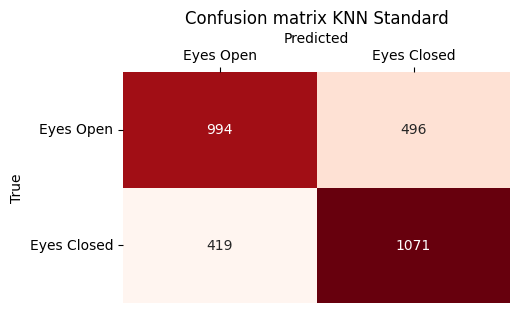

In [ ]:
# cm = pd.DataFrame(cm)
# import seaborn as sns

# plt.figure(figsize=(5,3))
# sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Eyes Open', 'Eyes Closed'], yticklabels=['Eyes Open', 'Eyes Closed'], cbar=False)
# plt.title('Confusion matrix KNN Standard')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')
# plt.show()




In [ ]:
import